# Final Project Code

## About Project

``Objective``

1. 

2. 

3. 

``Background``



``Data Source``

Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

---

## Import and Functions

In [60]:
# Import

# Standard
import numpy as np
import pandas as pd
import random
import os

# ML Libraries
import tensorflow as tf
from tensorflow import keras

import sklearn
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


# Plots and Images
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.plotting import heatmap
from mlxtend.plotting import plot_decision_regions
from IPython.display import Image

# Silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

# Warnings 
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Set pandas row/column maximum
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [ ]:
# Functions

---

## Data

- Read data
- EDA, summary statistics
- Data cleaning
- Train/test/val

### Load Data

In [8]:
# Load train and test data

train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [9]:
# View shape and sample of data

print('Shape of train: ', train.shape)
print('Shape of test: ', test.shape)

Shape of train:  (1460, 81)
Shape of test:  (1459, 80)


Train and test is a 50/50 split, with train dataset having one more row.

Test has one less column, `SalePrice`, which was intended to be predicted. The sample_submission.csv file has sale price that we can use as target data.

We will further split data later on.

### EDA

In [10]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
# Columns, non-null counts, dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [16]:
# Missing values
train_null_counts = train.isnull().sum()

print("Train Dataset Count of Null Values:\n" ,train_null_counts[train_null_counts > 0].sort_values(ascending=False), sep="")

Train Dataset Count of Null Values:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [12]:
# Get more info for these columns 
cols_with_null = train.columns[train.isnull().any()].tolist()

for col in cols_with_null:
    dtypes = train[col].dtype
    first_5_ex = train[col][0:5]
    print(f"{col} - dtype: {dtypes} \nFirst 5 examples: {first_5_ex}")

LotFrontage - dtype: float64 
First 5 examples: 0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
Name: LotFrontage, dtype: float64
Alley - dtype: object 
First 5 examples: 0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Alley, dtype: object
MasVnrType - dtype: object 
First 5 examples: 0    BrkFace
1       None
2    BrkFace
3       None
4    BrkFace
Name: MasVnrType, dtype: object
MasVnrArea - dtype: float64 
First 5 examples: 0    196.0
1      0.0
2    162.0
3      0.0
4    350.0
Name: MasVnrArea, dtype: float64
BsmtQual - dtype: object 
First 5 examples: 0    Gd
1    Gd
2    Gd
3    TA
4    Gd
Name: BsmtQual, dtype: object
BsmtCond - dtype: object 
First 5 examples: 0    TA
1    TA
2    TA
3    Gd
4    TA
Name: BsmtCond, dtype: object
BsmtExposure - dtype: object 
First 5 examples: 0    No
1    Gd
2    Mn
3    No
4    Av
Name: BsmtExposure, dtype: object
BsmtFinType1 - dtype: object 
First 5 examples: 0    GLQ
1    ALQ
2    GLQ
3    ALQ
4    GLQ
Name: BsmtFinType1, dtype: object


Importantly, scikit-learn version 1.4.0 and above can handle missing values for Random Forest models. Hence it is not a requirement to transform missing values. 

However, there are some columns that have too many missing values. If more than 50% of the rows were missing, we removed the column.

In [19]:
# Drop unnecessary columns
cols_remove = ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence']

train = train.drop(columns=cols_remove)
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


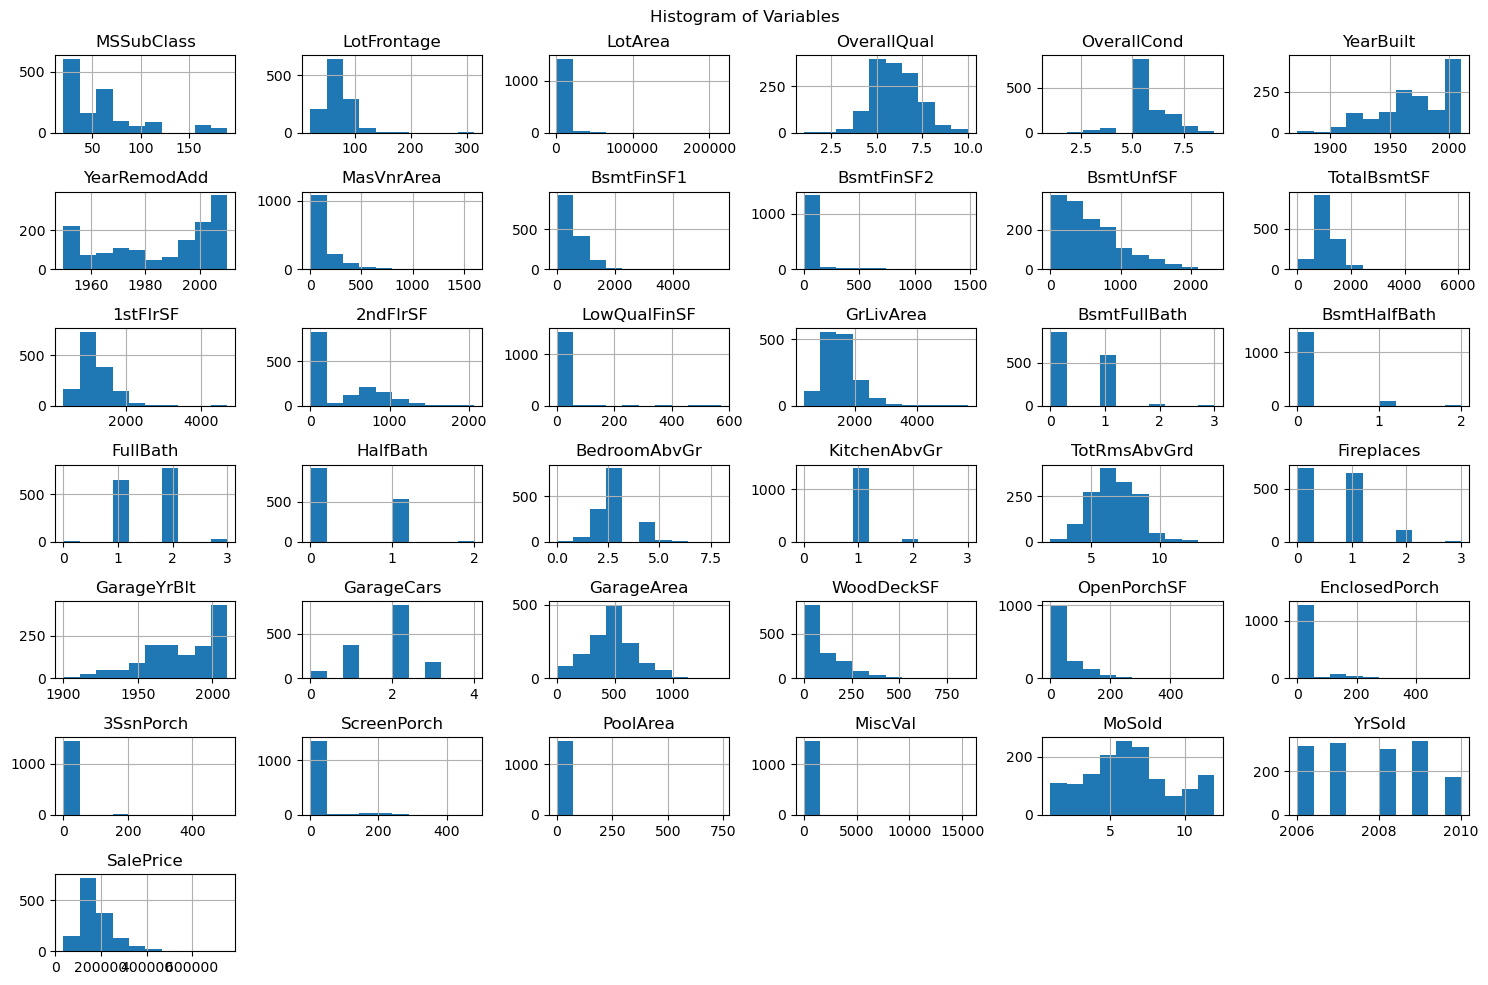

In [25]:
train.hist(figsize=(15, 10))
plt.suptitle("Histogram of Variables")
plt.tight_layout()
plt.show()

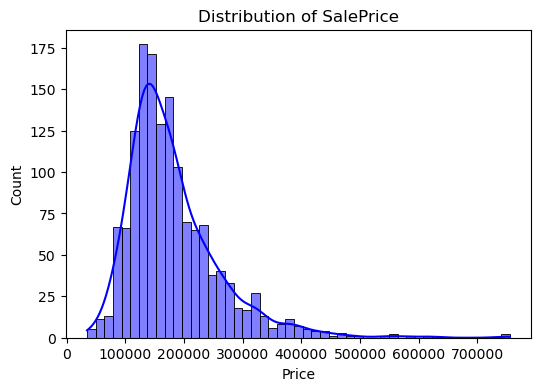

In [30]:
# Detailed histogram for SalePrice
plt.figure(figsize=(6, 4))
sns.histplot(train['SalePrice'], kde=True, color='blue', edgecolor='black')
plt.title("Distribution of SalePrice")
plt.xlabel("Price")
plt.grid(False)
plt.show()

In [37]:
# Summary statistic of SalePrice
pd.DataFrame(round(train['SalePrice'].describe(), 2))

,SalePrice
count,1460.0
mean,180921.2
std,79442.5
min,34900.0
25%,129975.0
50%,163000.0
75%,214000.0
max,755000.0


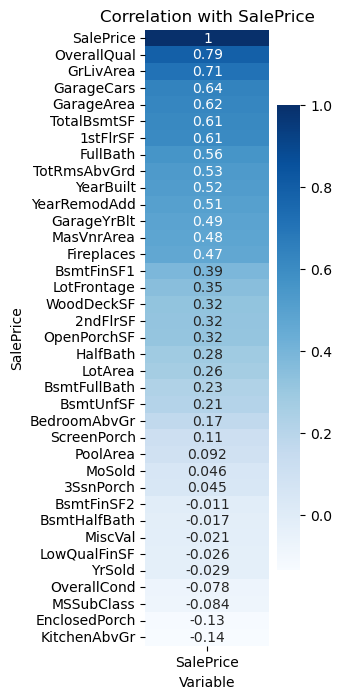

In [58]:
# Correlations
corr_matrix = numeric_cols.corr()

# Correlations with SalePrice, sorted by descending order
corr_matrix_SalePrice = corr_matrix['SalePrice'].sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(2,8))
sns.heatmap(corr_matrix_SalePrice.to_frame(), cmap='Blues', annot=True)
plt.title('Correlation with SalePrice')
plt.xlabel('Variable')
plt.ylabel('SalePrice')
plt.show()

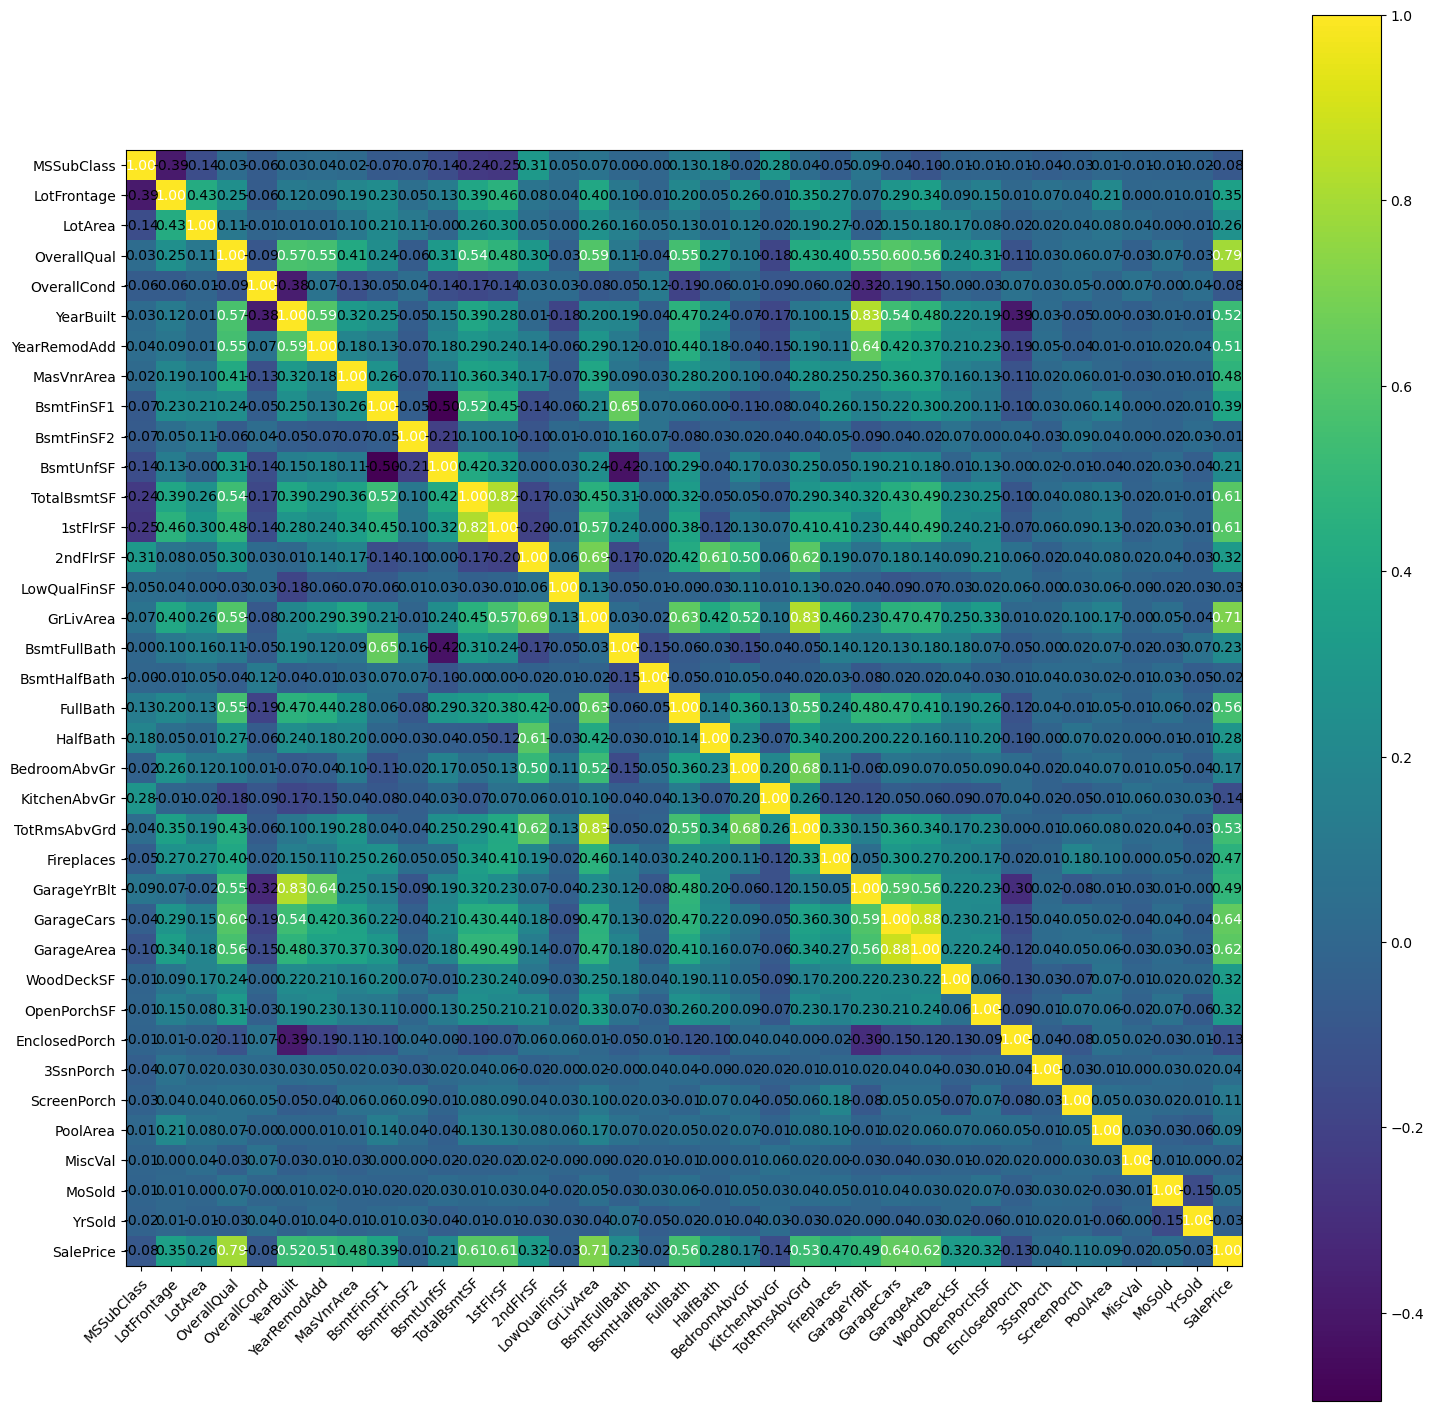

In [49]:
# Get only numeric columns
numeric_cols = train.select_dtypes(include=['number'])

# Heatmap of all variables
cm = numeric_cols.corr().values
hm = heatmap(
    cm,
    row_names=numeric_cols.columns,
    column_names=numeric_cols.columns,
    figsize=(18, 18)
)

### Train, Validation, Test

In [ ]:
# Make function for all data cleaning process above
def data_cleaning(dataset):
    pass 

In [59]:
# Run data_cleaning with test dataset

In [61]:
# Set seed
random_state = 0

# Split data
train_val_split_size = 0.2

# Shuffle training data
train_shuffled = train.sample(frac=1, random_state=42).reset_index(drop=True)

# Split shuffled training data into training and validation
X_train, X_val = train_test_split(train_shuffled, test_size=train_val_split_size, random_state=random_state)

# Pop out SalePrice as Y
Y_train = X_train.pop('SalePrice')
Y_val = X_val.pop('SalePrice')

# Shapes
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_val shape:", X_val.shape)
print("Y_val shape:", Y_val.shape)

X_train shape: (1168, 75)
Y_train shape: (1168,)
X_val shape: (292, 75)
Y_val shape: (292,)


In [ ]:
# Prepare test datset

# Run data cleaning
test = data_cleaning(test)

X_test = test

# Read test Y
Y_test = pd.read_csv('../data/sample_submission.csv')

Y_test = Y_test['SalePrice']

print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)

---

## Model

- Modeling decisions
- Data transformations/augment/processing
- Modeling 
- Visualizations and analysis

In [ ]:
rf = tfdf.keras.RandomForestModel(task = tfdf.keras.Task.REGRESSION)

---

## Evaluation